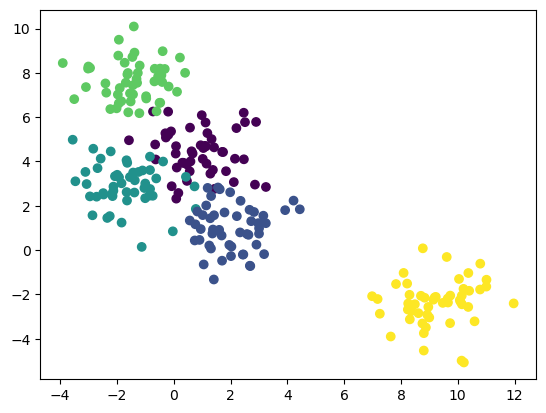

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=250, centers=5, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## k-means

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [5]:
kmeans.labels_

array([4, 4, 0, 1, 2, 0, 1, 0, 3, 2, 4, 0, 3, 2, 1, 2, 2, 4, 2, 0, 0, 0,
       4, 1, 1, 1, 0, 3, 4, 1, 0, 0, 2, 3, 4, 2, 2, 4, 2, 2, 4, 3, 1, 0,
       0, 3, 3, 2, 0, 1, 0, 1, 1, 1, 3, 2, 3, 4, 0, 0, 0, 3, 2, 3, 3, 0,
       4, 3, 4, 0, 0, 2, 4, 2, 1, 0, 2, 1, 1, 4, 1, 4, 0, 3, 2, 0, 3, 4,
       2, 3, 0, 3, 1, 0, 4, 1, 3, 2, 0, 2, 4, 3, 2, 0, 3, 3, 0, 4, 3, 0,
       0, 3, 3, 1, 3, 1, 0, 2, 3, 4, 4, 0, 2, 4, 3, 3, 4, 2, 2, 3, 4, 4,
       0, 2, 2, 4, 0, 1, 3, 3, 2, 0, 2, 1, 2, 3, 2, 0, 4, 0, 1, 0, 4, 3,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 0, 1, 4, 0, 1, 2, 3, 3, 4, 2, 2, 0, 4,
       4, 1, 4, 2, 1, 3, 1, 1, 0, 4, 3, 1, 2, 1, 1, 2, 3, 4, 4, 2, 1, 2,
       1, 3, 4, 2, 1, 1, 1, 4, 3, 2, 0, 4, 3, 3, 2, 0, 3, 4, 4, 0, 3, 4,
       3, 2, 0, 1, 3, 3, 0, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 4, 4, 1, 2, 1,
       4, 1, 4, 3, 4, 3, 1, 1], dtype=int32)

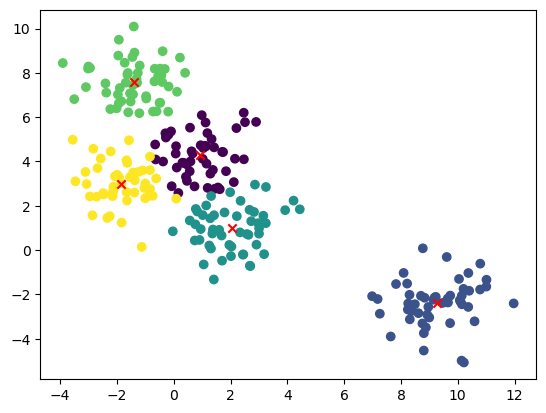

In [8]:
center = kmeans.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(center[:,0],center[:,1],marker='x',c='red')

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


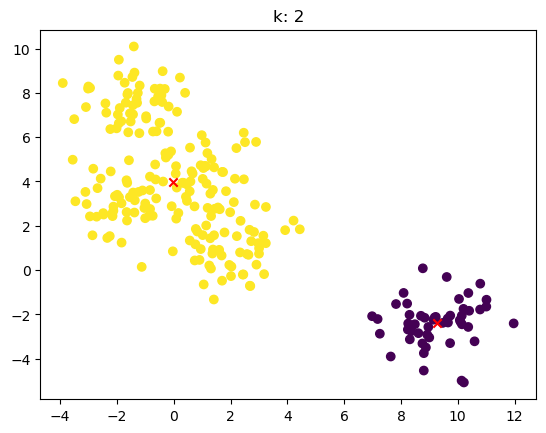

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


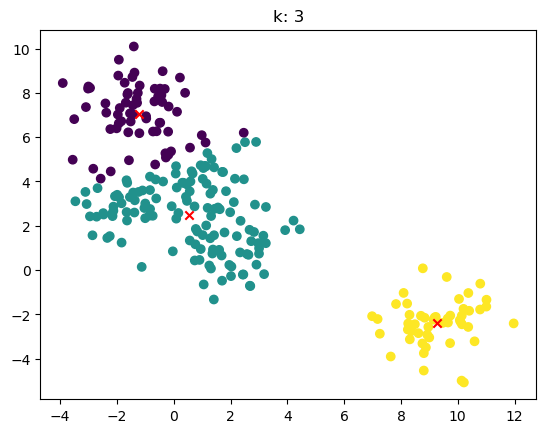

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


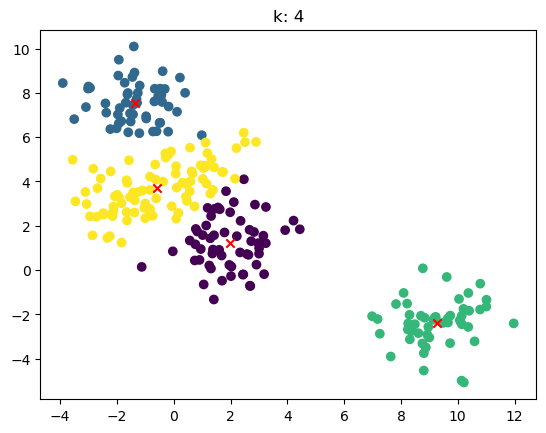

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


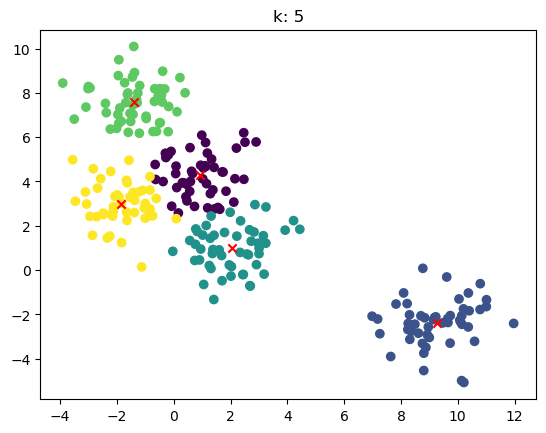

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


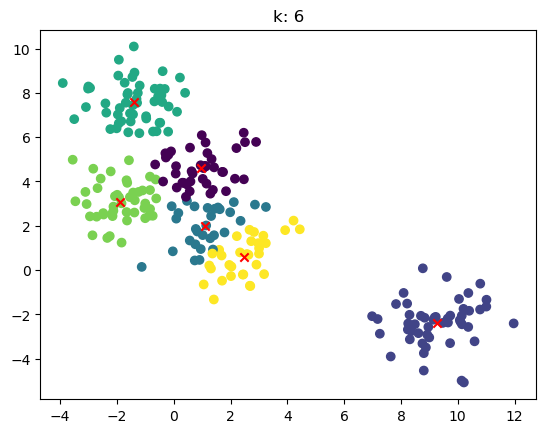

/home/utopia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


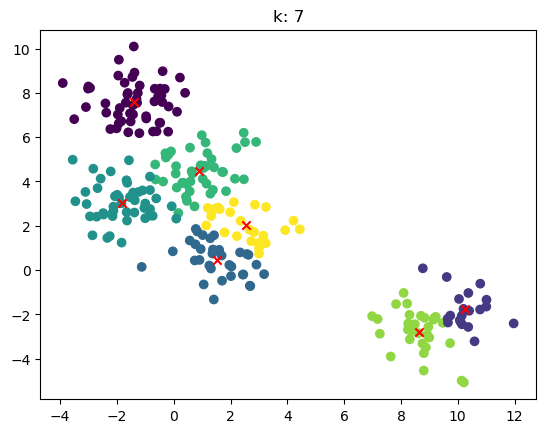

In [9]:
for n_clusters in [2, 3, 4, 5, 6, 7]:
    clusterer = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    z = clusterer.labels_
    center = clusterer.cluster_centers_
    plt.scatter(X[:,0], X[:,1], c=z)
    plt.scatter(center[:,0], center[:,1], marker='x', c='red')
    plt.title("k: {0}".format(n_clusters))
    plt.show()

## agglomerative clustering

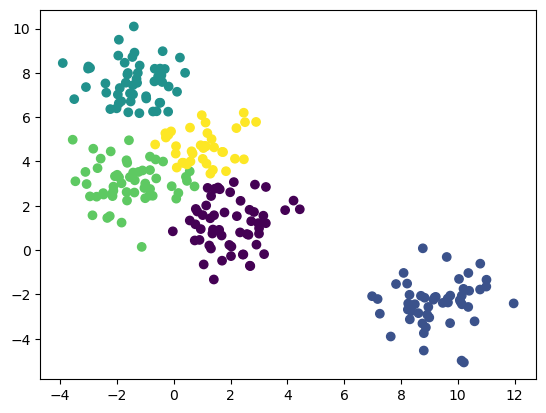

In [11]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(linkage='ward', n_clusters=5).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.show()

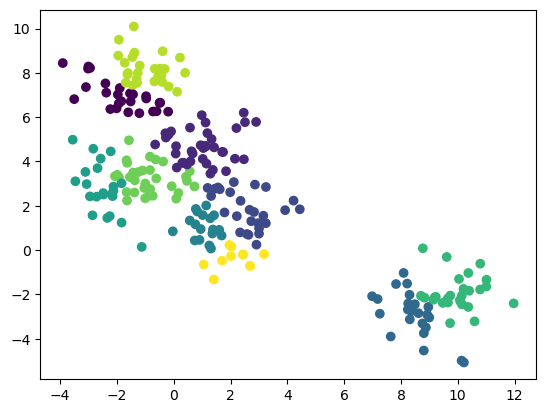

In [12]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(linkage='ward', n_clusters=10).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.show()

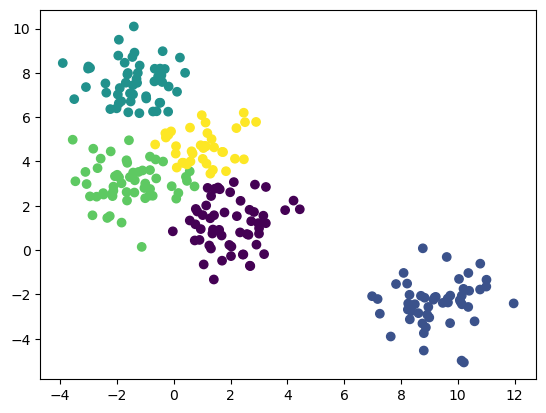

In [13]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(distance_threshold=10, n_clusters=None).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=agg.labels_)
plt.show()

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram

def show_dendrogram(model):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix)

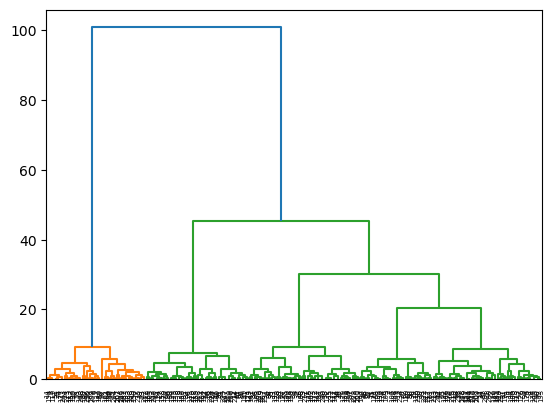

In [15]:
show_dendrogram(agg)